In [70]:
from mypca import *
import pandas as pd
from sklearn import preprocessing, cluster, pipeline, compose, decomposition
from sklearn import manifold
from sklearn import metrics

In [71]:
df = pd.read_csv('kc_house_data.csv')

In [72]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [96]:
X.shape

(21613, 17)

In [73]:
X = df.drop(['id', 'date', 'zipcode', 'price'], axis =1)
y = df['price']
n_comp = 6  # Nombre de dimensions
features = X.columns  # Extraction des noms de variables
names = X.index  # Extraction des noms de pays

In [74]:
scaler = preprocessing.StandardScaler()

In [75]:
pca = decomposition.PCA(n_components=n_comp)

pipeline_pca = pipeline.make_pipeline(scaler, pca)

In [76]:
pipeline_pca.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=6))])

In [77]:
y.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [78]:
label_price = [
    '0 - Très faible',
    '1 - Faible',
    '2 - Moyen',
    '3 - Èlevé',
    '4 - Très élevé'
]

price_cat = pd.cut(y, bins=5, labels=label_price, right=False)

## groupe

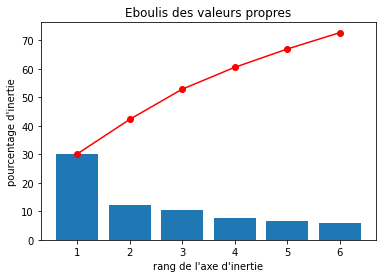

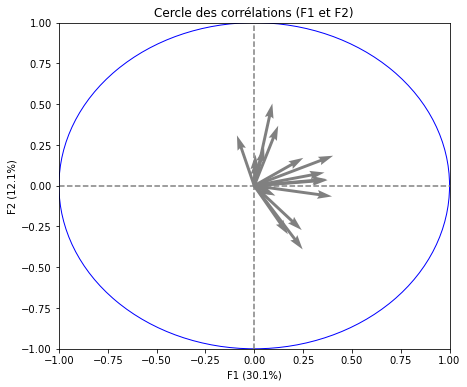

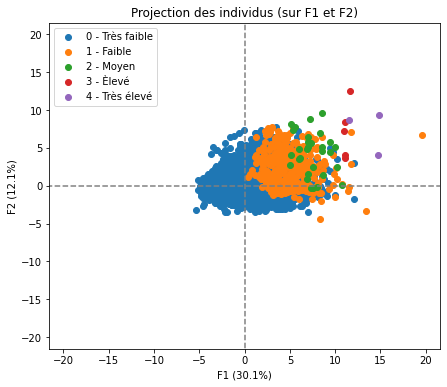

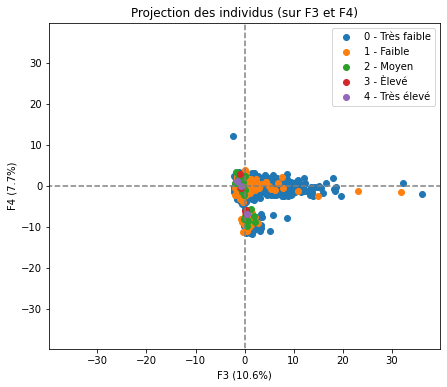

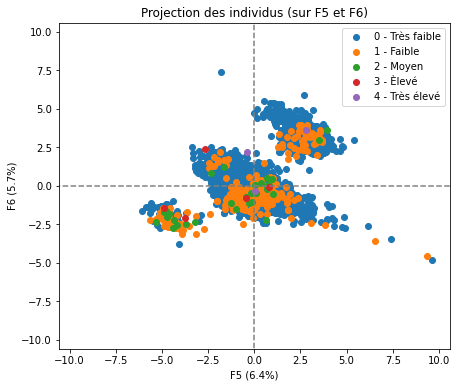

In [79]:
# Eboulis des valeurs propres
display_scree_plot(pipeline_pca[1])

# Cercle des corrélations
pcs = pipeline_pca[1].components_
display_circles(pcs, n_comp, pipeline_pca[1], [(0,1)], labels = None , title='Cercles_corr')

# Projection des individus
X_projected = pipeline_pca.transform(X)
display_factorial_planes(X_projected, n_comp, pipeline_pca[1], [(0,1),(2,3),(4,5)], illustrative_var=price_cat, title='Projection_indiv')

plt.show()

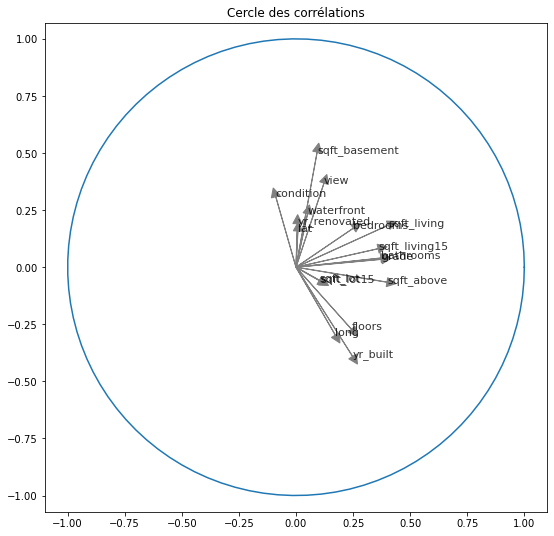

In [80]:
labels = features

# Cercle des corrélations
(fig, ax) = plt.subplots(figsize=(9, 9))
for i in range(0, pipeline_pca[1].components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  # 0 for PC1
             pca.components_[1, i],  # 1 for PC2
             head_width=0.04,
             head_length=0.04,
             color='gray'
             )

    plt.text(pca.components_[0, i],
             pca.components_[1, i],
             labels[i],
             fontsize=11,
             alpha=0.8
             )


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Cercle des corrélations')
plt.show()

In [81]:
# Variance expliquée

print(pipeline_pca[1].explained_variance_ratio_)

[0.30110147 0.1211368  0.10599747 0.07658575 0.06419362 0.05737634]


In [98]:
pipeline_pca[1].explained_variance_ratio_.sum()

0.7263914524299703

In [82]:
from sklearn.preprocessing import PolynomialFeatures

In [83]:
my_pipe = pipeline.make_pipeline(PolynomialFeatures(), scaler)

In [84]:
poly_norm = my_pipe.fit_transform(X)

In [85]:
X.shape

(21613, 17)

In [86]:
poly_norm.shape

(21613, 171)

In [87]:
pca_99 = decomposition.PCA(n_components=0.99)

In [88]:
my_pipe = pipeline.make_pipeline(PolynomialFeatures(), scaler, pca_99)

In [89]:
my_pipe.fit_transform(X).shape

(21613, 40)

In [90]:
from sklearn.cluster import KMeans

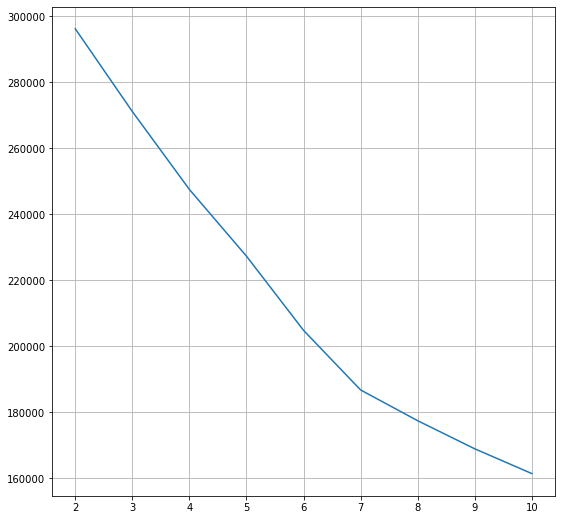

In [91]:
# méthode du coude avec le calcul de l'inertie

inertia = []
nb_cluster_max = 10
for z in range(2,nb_cluster_max+1):
    kmeans = KMeans(n_clusters = z)
    k_pipe = pipeline.make_pipeline(scaler, kmeans)
    k_pipe.fit(X)
    inertia.append(k_pipe[1].inertia_)
    
x = np.arange(2,nb_cluster_max+1)

fig, ax = plt.subplots(figsize=(9, 9))
ax.set_xticks(ticks=np.arange(0,25,1))
ax.grid(b=True)
plt.plot(x, inertia)
plt.show()

In [92]:
# défintions d'un code couleur pour chaque groupe

cmap = {
    0:'Crimson',
    1:'Sienna',
    2:'DarkBlue',
    3:'Orange',
    4:'Black',
    5:'Silver',
    6:'Chartreuse',
    7:'Fuchsia',
    8:'gray',
    9:'gray',
    10:'gray',
    11:'gray',
}

For n_clusters = 2 The average silhouette_score is : 0.7312410727567864
For n_clusters = 3 The average silhouette_score is : 0.4573142874469632
For n_clusters = 4 The average silhouette_score is : 0.32779619822369105
For n_clusters = 5 The average silhouette_score is : 0.32802606630714065
For n_clusters = 6 The average silhouette_score is : 0.3270131955661941
For n_clusters = 7 The average silhouette_score is : 0.3220309541929981
For n_clusters = 8 The average silhouette_score is : 0.28203550511862646
For n_clusters = 9 The average silhouette_score is : 0.283222867828774
For n_clusters = 10 The average silhouette_score is : 0.29766802618715227


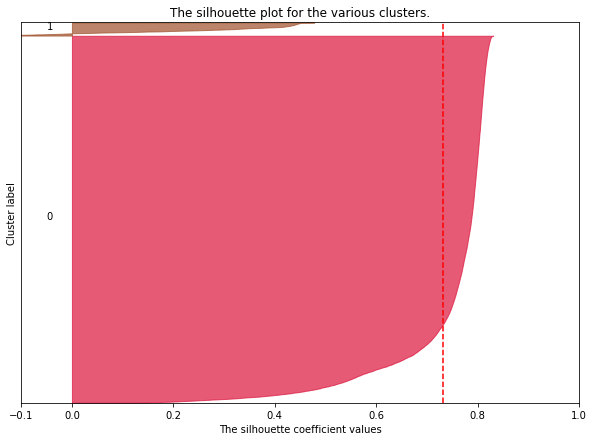

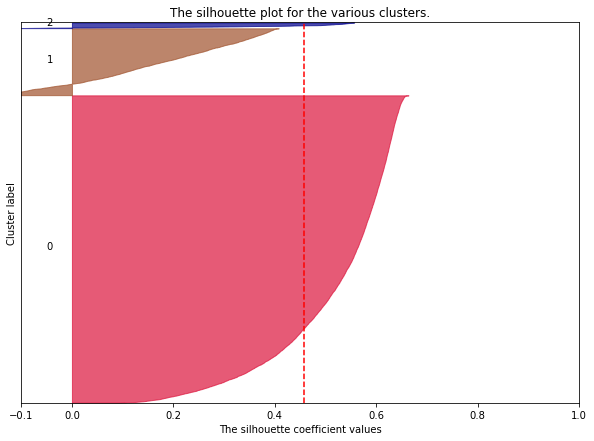

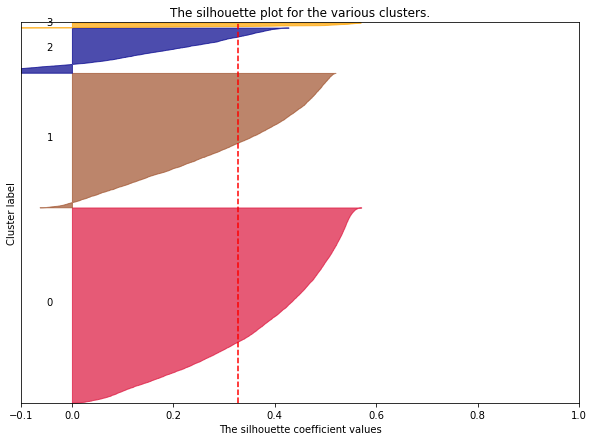

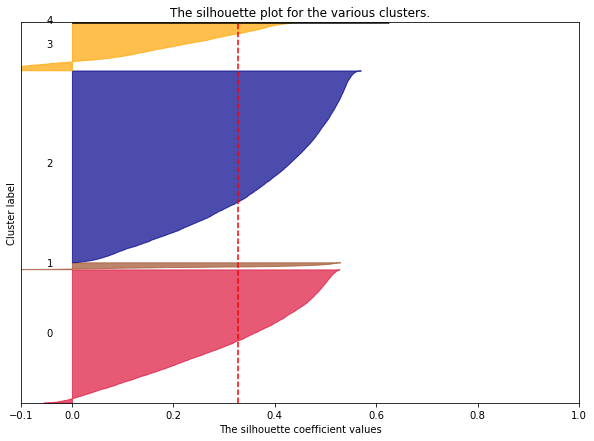

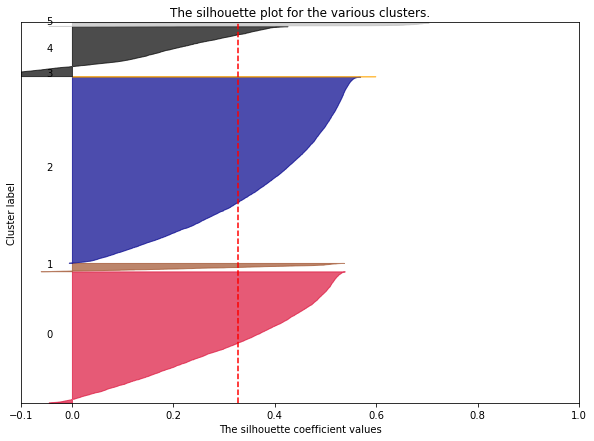

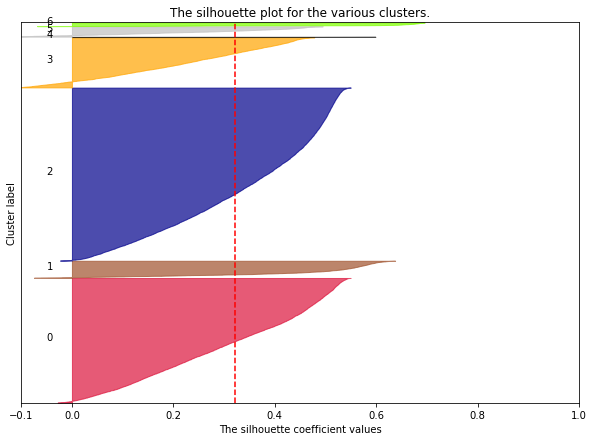

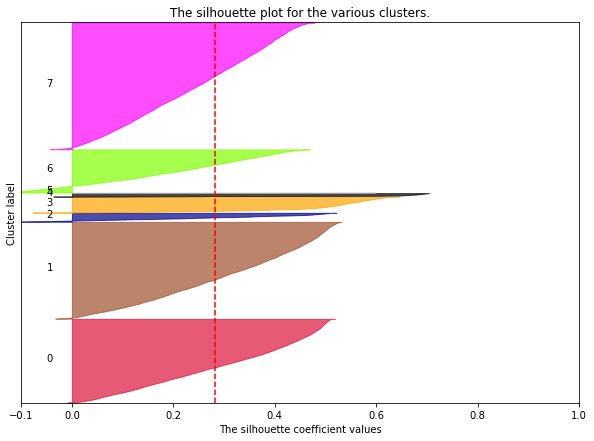

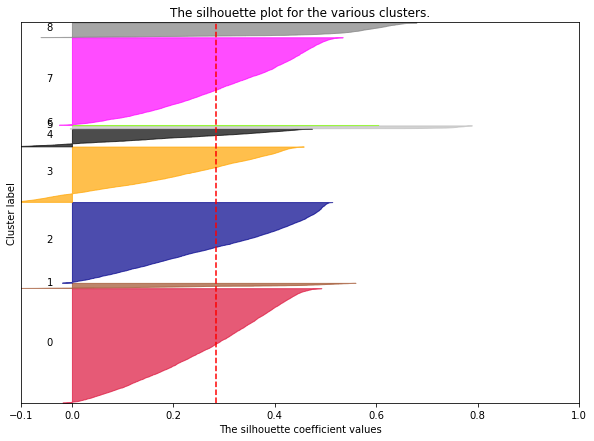

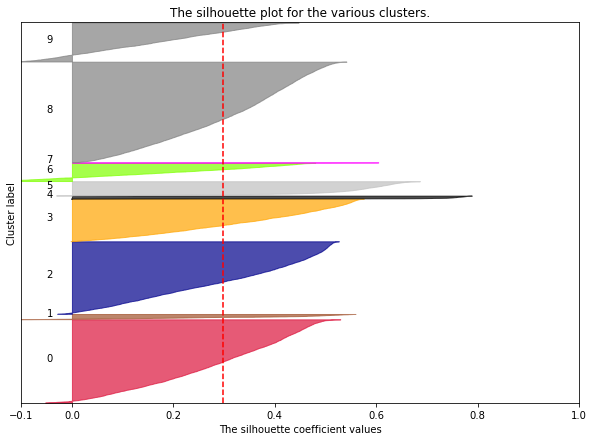

In [93]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

silhouette = []

range_n_clusters = range(2,nb_cluster_max+1)

prep_X = k_pipe.fit_transform(X)

for n_clusters in range_n_clusters:
    # Création d'un subplot
    fig, ax1 = plt.subplots()
    fig.set_size_inches(10, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(prep_X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(prep_X)
    silhouette_avg = silhouette_score(prep_X, cluster_labels)
    silhouette.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Calcul du score silhouette
    sample_silhouette_values = silhouette_samples(prep_X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cmap
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color[i], edgecolor=color[i], alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

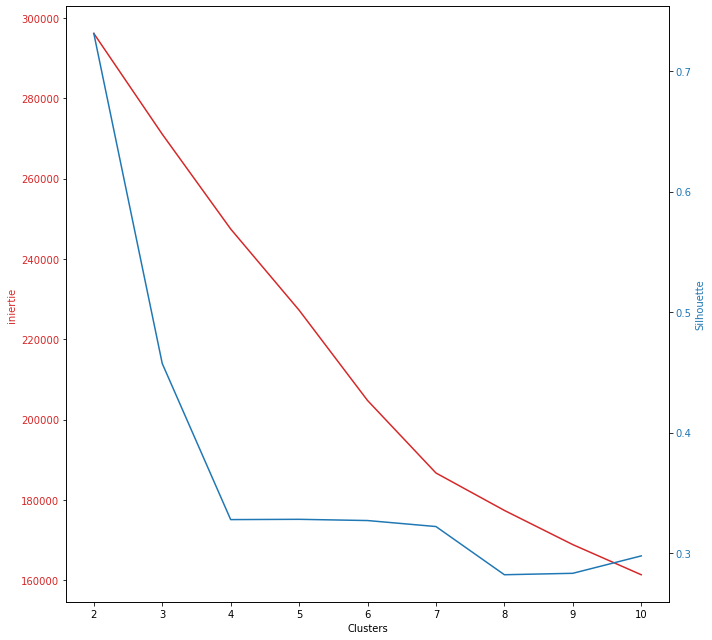

In [94]:
# Création d'un grapique pour afficher l'inertie et le silhouette score sur un même axe X

fig, ax1 = plt.subplots(figsize=(10,9))

color = 'tab:red'
ax1.set_xlabel('Clusters')
ax1.set_ylabel('iniertie', color=color)
ax1.plot(list(range_n_clusters), inertia, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Deuxième axe qui partage l'axe x

color = 'tab:blue'
ax2.set_ylabel('Silhouette', color=color)  
ax2.plot(list(range_n_clusters), silhouette, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

## cluster

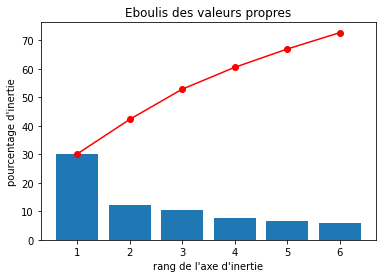

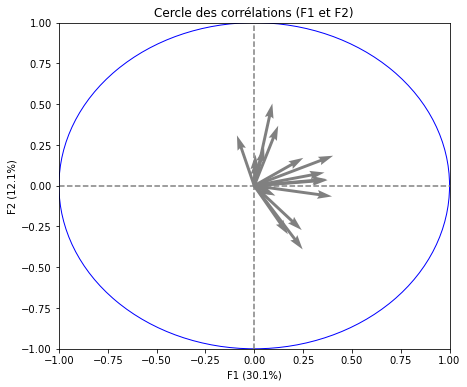

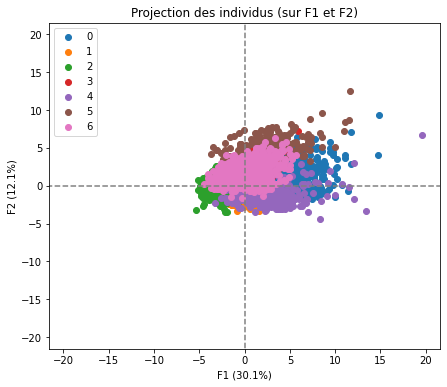

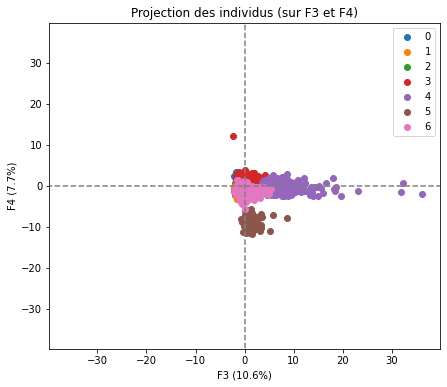

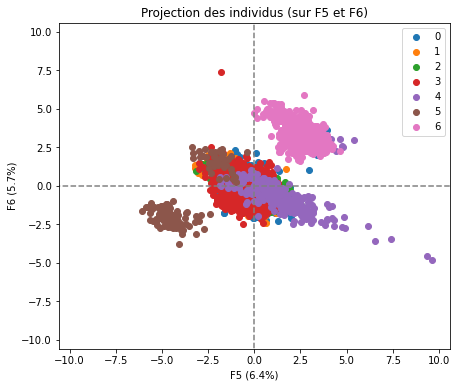

In [97]:
k_pipe = pipeline.make_pipeline(scaler, KMeans(n_clusters = 7))
k_pipe.fit_transform(X)
labels_kmeans6= k_pipe[1].labels_

# Eboulis des valeurs propres
display_scree_plot(pipeline_pca[1])

# Cercle des corrélations
pcs = pipeline_pca[1].components_
display_circles(pcs, n_comp, pipeline_pca[1], [(0,1)], labels = None , title='Cercles_corr')

# Projection des individus
X_projected = pipeline_pca.transform(X)
display_factorial_planes(X_projected, n_comp, pipeline_pca[1], [(0,1),(2,3),(4,5)], illustrative_var=labels_kmeans6, title='Projection_indiv')

plt.show()